In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [4]:
df=pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group C            some high school  free/reduced   
1  female        group B                 high school  free/reduced   
2  female        group B            some high school  free/reduced   
3  female        group B                some college      standard   
4  female        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none           0             17             10  
1                    none           8             24             23  
2                    none          18             32             28  
3                    none          11             38             32  
4                    none          22             39             33

# 1. Find out how many males and females participated in the test.


In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#518 males and 482 females are participated in the test

# 2. What do you think about the students' parental level of education?


(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

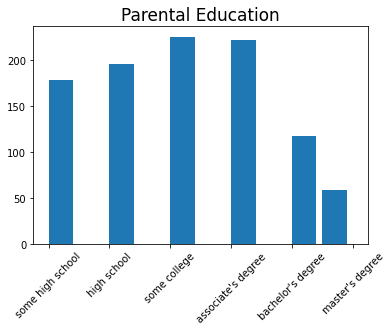

In [7]:
plt.figure()
plt.hist(df['parental level of education'],width=0.4,cumulative=False)
plt.title('Parental Education',fontsize=17)
plt.xticks(rotation=45)
plt.yticks()

All parents are educated,yet only few of them are holding master's degree

# 3. Who scores the most on average for math, reading and writing

In [8]:
df1=df.mean(axis=0)

C:\Users\nivin\AppData\Local\Temp\ipykernel_22440\2803276057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df.mean(axis=0)


In [13]:
df1

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [9]:
gndr = df.groupby(["gender"]).describe()
gndr

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.590734  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.545643  ...  76.0  100.0         482.0  63.446058   

                                                  
              std   min   25%   50%   75%    max  
gender                                            
female  14.844842  10.0  64.0  74.0  82.0  100.0  
male    14.227225  15.0  53.0  64.0  74.0  100.0  

[2 rows x 24 columns]

# 3.A

In [10]:
mean = df.groupby(["gender"]).mean()
mean

math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058

males scored above avg in maths while females scored both reading and writing

# 3.B

In [11]:
mean = df.groupby(["gender","test preparation course"]).mean()
mean

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

Those who completed Test preperation course scored better avg for all subs

# 4. What do you think about the scoring variation for math, reading and writing


In [25]:
v1=df.groupby(["gender"]).var()
v1

math score  reading score  writing score
gender                                          
female  256.958593     207.677438     220.369327
male    211.889097     200.211010     202.413924

females are having better score variation

# 4.B

In [34]:
v2=df.groupby(["test preparation course"]).var()
v2

math score  reading score  writing score
test preparation course                                          
completed                210.884027     183.265864     175.202612
none                     246.668662     213.419851     226.251739

people who are not taking test preparation course have scoring variation

# 5)TOP 25% OF THE STUDENTS BASED ON MATH SCORE

In [36]:
df.nlargest(250, ['math score'])

gender race/ethnicity parental level of education         lunch  \
515  female        group E                some college      standard   
516  female        group E           bachelor's degree      standard   
517  female        group E          associate's degree      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
..      ...            ...                         ...           ...   
428  female        group D                some college  free/reduced   
429  female        group E            some high school      standard   
849    male        group A           bachelor's degree      standard   
850    male        group C          associate's degree  free/reduced   
851    male        group D                some college      standard   

    test preparation course  math score  reading score  writing score  
515                    none         100             92             97  
516                    none         100            100            100  
517                    none         100            100            100  
996               completed         100             96             86  
997               completed         100             97             99  
..                      ...         ...            ...            ...  
428                    none          77             86             86  
429                    none          77             79             80  
849                    none          77             67             68  
850                    none          77             67             64  
851               completed          77             62             62  

[250 rows x 8 columns]